## Assignment 3 : MATPLOTLIB
### Name : Palak Nath
### PRN : 17070124048

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

Dataset Taken: Titanic 

In [46]:
df=pd.read_csv('titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### BAR PLOT

Total Survival 

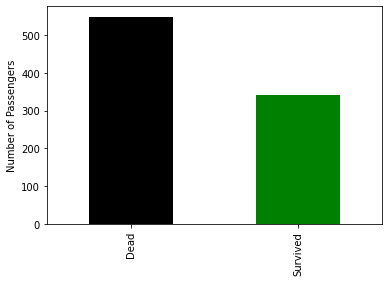

In [4]:
ax = df['survived'].value_counts().plot(kind='bar', color=['black','green'])
ax.set_xticklabels(['Dead','Survived'])
ax.set(ylabel='Number of Passengers')
plt.show()

Male Survival 

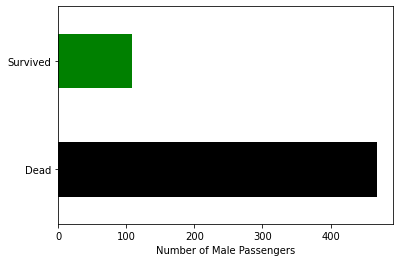

In [5]:
ax = df[df['sex']=='male']['survived'].value_counts().plot(kind='barh', color=['black','green'])
ax.set_yticklabels(['Dead','Survived'])
ax.set(xlabel='Number of Male Passengers')
plt.show()

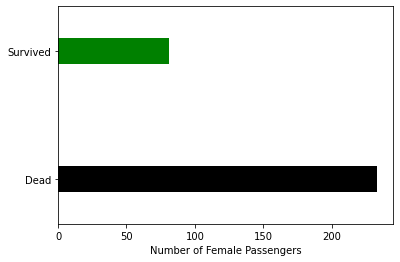

In [6]:
ax = df[df['sex']=='female']['survived'].value_counts().plot(kind='barh', color=['black','green'],width=0.2)
ax.set_yticklabels(['Dead','Survived'])
ax.set(xlabel='Number of Female Passengers')
plt.show()

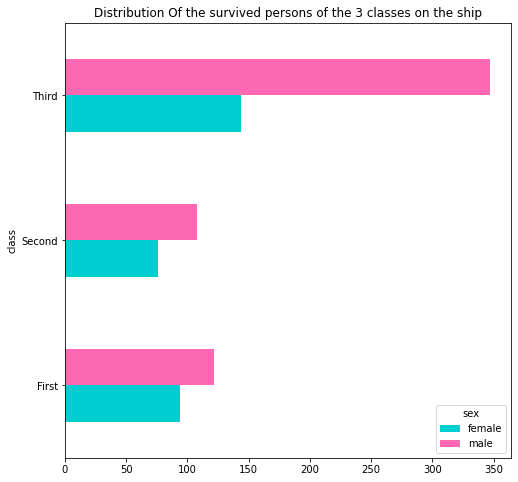

In [40]:
survived_class=df.groupby(['class','sex'])['survived'].count().reset_index().sort_values(by='sex',ascending=False)
survived_class=survived_class.pivot('class','sex','survived').fillna(0)
top=survived_class
top.plot.barh(width=0.5,color=['darkturquoise','hotpink'])
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title('Distribution Of the survived persons of the 3 classes on the ship')
plt.show()

#### HISTOGRAM

<AxesSubplot:>

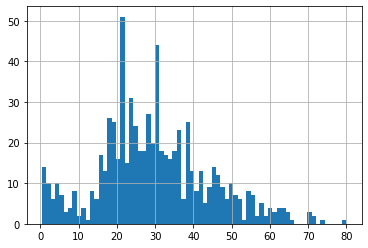

In [8]:
df['age'].hist(bins=70)

#### SCATTER PLOT

In [9]:
x=df['fare']
y=df['age']

No handles with labels found to put in legend.


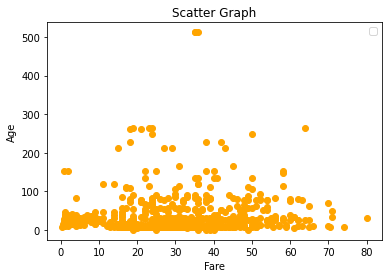

In [10]:
plt.xlabel("Fare")
plt.ylabel("Age")
plt.title("Scatter Graph")
plt.scatter(y,x,c="orange")
plt.legend()
plt.show()

##### FACTOR PLOT 

C:\Users\Admin\anaconda3\envs\orion\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Admin\anaconda3\envs\orion\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


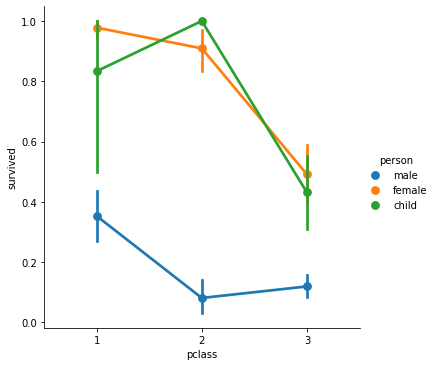

In [11]:
def titanic_children(passenger):
    
    age , sex = passenger
    if age <16:
        return 'child'
    else:
        return sex
    
df['person'] = df[['age','sex']].apply(titanic_children,axis=1)
sns.factorplot('pclass','survived',data=df,hue='person')

#### PIE CHART

In [12]:
s=df['sex'].value_counts()
s

male      577
female    314
Name: sex, dtype: int64

In [13]:
num_males=s[0]
num_females=s[1]

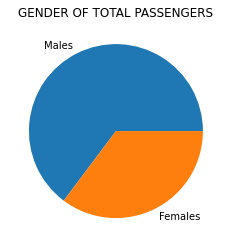

In [14]:
y = np.array([num_males,num_females])
mylabels = ["Males","Females"]
plt.pie(y,labels=mylabels)
plt.title('GENDER OF TOTAL PASSENGERS')
plt.show()

In [15]:
c=df['class'].value_counts()
c

Third     491
First     216
Second    184
Name: class, dtype: int64

In [16]:
third=c[0]
first=c[1]
second=c[2]

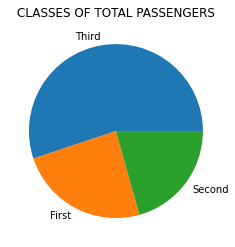

In [44]:
y = np.array([third,first,second])
mylabels = ["Third","First","Second"]
plt.pie(y,labels=mylabels)
plt.title('CLASSES OF TOTAL PASSENGERS')
plt.show()

#### LINE GRAPH

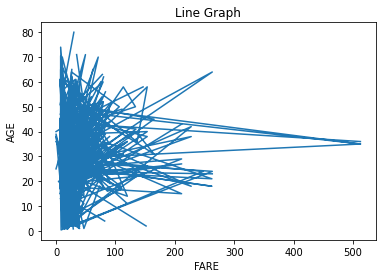

In [18]:
x=df['fare']
y=df['age']
plt.xlabel("FARE ")
plt.ylabel("AGE")
plt.title("Line Graph")
plt.plot(x,y)

#### BOX PLOT

<AxesSubplot:xlabel='class', ylabel='age'>

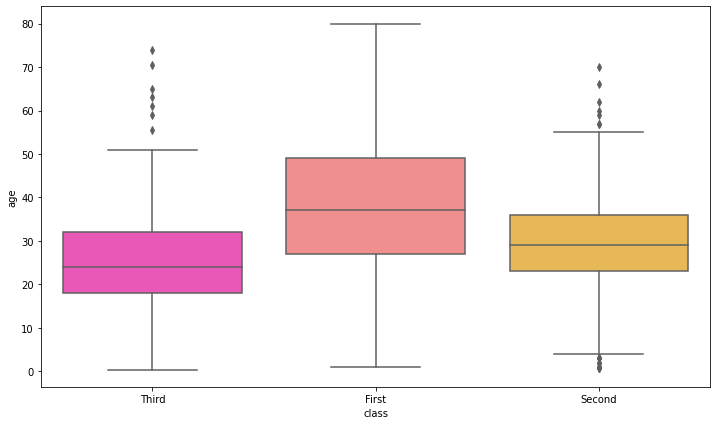

In [42]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='class',y='age',data=df, palette='spring')

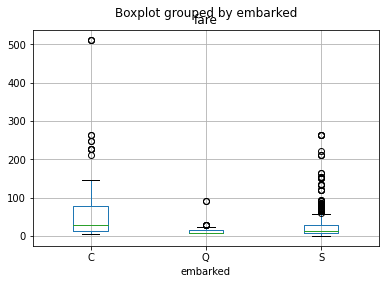

In [55]:
df.boxplot(column="fare", by = "embarked")
plt.show()

C:\Users\Admin\anaconda3\envs\orion\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


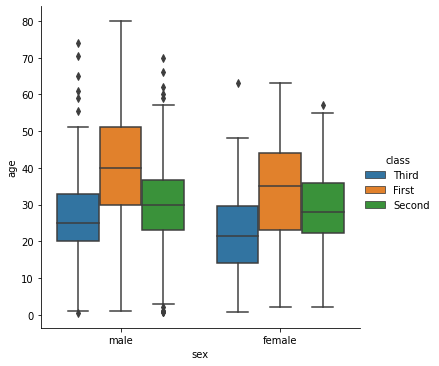

In [57]:
sns.factorplot(x = "sex", y = "age", hue = "class",data = df, kind = "box")
plt.show()

#### HEAT MAP 

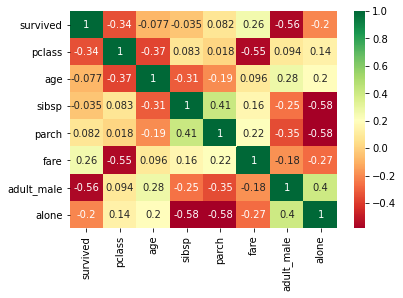

In [19]:
def titanic_corr(data):
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
    
titanic_corr(df)

#### Heat Map of Null Values

<AxesSubplot:>

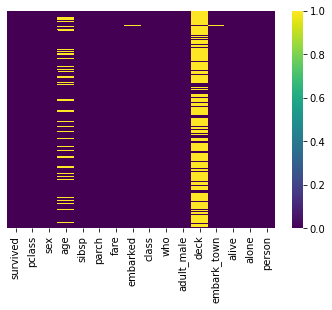

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

### END OF ASSIGNMENT 